https://arxiv.org/pdf/2211.10295.pdf

# 1 Initialize

In [1]:
visible_devices = [3]
import datetime
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if len(visible_devices) == 0:
        visible_devices = int(visible_devices) # type: ignore
    elif len(visible_devices) == 1:
        if len(visible_devices[0]) == 0: # type: ignore
            visible_devices = int(visible_devices[0])
        else:
            visible_devices = [int(i) for i in visible_devices[0]] # type: ignore
    else:
        visible_devices = [int(i) for i in visible_devices]
print("Visible devices:", visible_devices)
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

sys.path.insert(0,'../utils_func/')
import MixtureDistributions # type: ignore

sys.path.insert(0,'../')
import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std # type: ignore

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
gpu_models = get_gpu_info()
if gpu_models:
    training_device = gpu_models[eval(os.environ["CUDA_VISIBLE_DEVICES"])]
    print("Successfully loaded GPU model: {}".format(training_device))
else:
    training_device = 'undetermined'
    print("Failed to load GPU model. Defaulting to 'undetermined'.")
    
results_dir = "../results/"
null_hypotheses_dir = "../results/null_hypotheses/"
if not os.path.exists(results_dir):
    print("WARNING: Results directory does not exist")
if not os.path.exists(null_hypotheses_dir):
    print("WARNING: Null hypotheses directory does not exist")
    
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-01-10 08:56:36.139969: Importing os...
2024-01-10 08:56:36.140164: Importing sys...
Visible devices: [3]
2024-01-10 08:56:36.140619: Importing timer from timeit...
2024-01-10 08:56:36.140733: Setting env variables for tf import (only device [3] will be available)...
2024-01-10 08:56:36.140929: Importing numpy...
2024-01-10 08:56:36.275043: Importing matplotlib...
2024-01-10 08:56:36.615600: Importing h5py...
2024-01-10 08:56:36.638956: Importing importlib.util...
2024-01-10 08:56:36.639072: Importing json...
2024-01-10 08:56:36.639150: Importing pandas...
2024-01-10 08:56:36.955441: Importing random...
2024-01-10 08:56:36.955630: Importing scipy utils...
2024-01-10 08:56:37.296657: Importing subprocess...
2024-01-10 08:56:37.296844: Importing tensorflow...
Tensorflow version: 2.12.0
2024-01-10 08:56:39.676794: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-01-10 08:56:39.963175: Importing timeit...
2024-01-10 08:56:39.963290: Importing tqdm...
2024

In [2]:
#seed = 0
#ndims = 5
#epsilon = 0.005
#GMetrics.utils.reset_random_seeds(seed)
#loc1 = np.array(np.zeros(ndims,dtype=np.float64),dtype=np.float64)
#scale1 = np.array(np.ones(ndims,dtype=np.float64),dtype=np.float64)
#loc2 = np.array(np.random.uniform(-epsilon,epsilon,ndims),dtype=np.float64)
#scale2 = np.array(np.random.uniform(1-epsilon,1+epsilon,ndims),dtype=np.float64)
#dist_1 = tfd.Independent(tfp.distributions.Normal(loc=loc1, scale=scale1), reinterpreted_batch_ndims=1)
#dist_2 = tfd.Independent(tfp.distributions.Normal(loc=loc2, scale=scale2), reinterpreted_batch_ndims=1)
#print(dist_1.dtype, dist_2.dtype)
#print('Types of distributions: ', type(dist_1), type(dist_2))
#print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
#print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
#print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

# Null hypotheses

In [3]:
seed = 0
ncomp = 3
ndims = 20
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (20,) (20,)


In [4]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10_000,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 100000000
batch_size 10000
niter 10000
niter * batch_size 100000000
small_sample False


In [5]:
TwoSampleTestInputs.dist_1_num

<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [6]:
TwoSampleTestInputs.dist_2_num

<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [7]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
MultiKSTest = GMetrics.MultiKSTest(TwoSampleTestInputs,
                                   progress_bar = True,
                                   verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [8]:
#d1 = np.array(TwoSampleTestInputs.dist_1_num).reshape(TwoSampleTestInputs.niter,TwoSampleTestInputs.batch_size_test,-1)
#d2 = np.array(TwoSampleTestInputs.dist_2_num).reshape(TwoSampleTestInputs.niter,TwoSampleTestInputs.batch_size_test,-1)
#print("------------------------------------------")
#print("Starting FPD metric calculation...")
#print("Running Jetnet FPD calculation...")
#print("niter = 10")
#print("batch_size = 10000")
#start = timer()
#FPDResult = [JMetrics.fpd(s1,s2)[0] for s1,s2 in zip(d1,d2)]
#end = timer()
#print(f"FPD metric calculation completed in {end-start} seconds.")

## FN Test

In [8]:
FNMetric.Test_tf(max_vectorize = 1000)
FNMetric.Results[-1].result_value


------------------------------------------
Starting FN metric calculation...
Running TF FN calculation...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 10
Iterating from 0 to 1000 out of 10000 .


In [8]:
FNMetric.Results.save_to_json(null_hypotheses_dir+"Null_20D_FN.json")

In [9]:
FNMetric.Results.load_from_json(null_hypotheses_dir+"Null_20D_FN.json")

mu = 0.747439595885676 +/- 0.0005708374865563447
sigma = 0.23892205560733498 +/- 0.002175023154019007


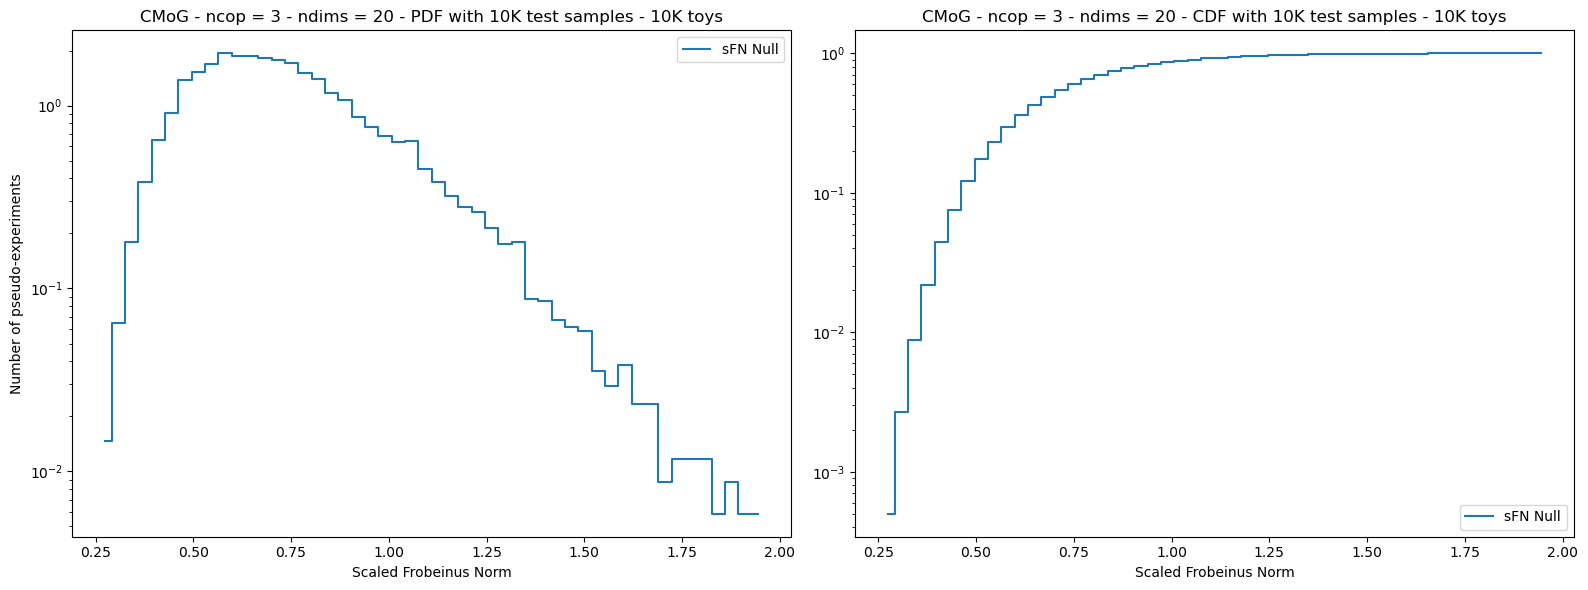

Time elapsed: 0.8514358848333359 seconds.


In [38]:
start = timer()

nsamples = FNMetric.Inputs.batch_size_test
niter = FNMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(FNMetric.Results[-1].result_value["metric_list"])*np.sqrt(ns)/ndims
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=0.155)
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=0.155)
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='sFN Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005, 0.2)
#ax[0].set_ylim(0.01, 40)
ax[0].set_xlabel('Scaled Frobeinus Norm')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='sFN Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005, 0.2)
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Scaled Frobeinus Norm')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [39]:
cl_list = [0.68, 0.95, 0.99]
fn_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
fn_thresholds

[[0.68, [6800, 3199], 0.8186004313807393],
 [0.95, [9500, 500], 1.2038495020448647],
 [0.99, [9900, 100], 1.4759807705243078]]

## KS Test

In [11]:
KSTest.Test_tf(max_vectorize=1000)
KSTest.Results[-1].result_value


------------------------------------------
Starting KS tests calculation...
Running TF KS tests...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 200
Iterating from 0 to 50 out of 10000 .
Iterating from 50 to 100 out of 10000 .
Iterating from 100 to 150 out of 10000 .
Iterating from 150 to 200 out of 10000 .
Iterating from 200 to 250 out of 10000 .
Iterating from 250 to 300 out of 10000 .
Iterating from 300 to 350 out of 10000 .
Iterating from 350 to 400 out of 10000 .
Iterating from 400 to 450 out of 10000 .
Iterating from 450 to 500 out of 10000 .
Iterating from 500 to 550 out of 10000 .
Iterating from 550 to 600 out of 10000 .
Iterating from 600 to 650 out of 10000 .
Iterating from 650 to 700 out of 10000 .
Iterating from 700 to 750 out of 10000 .
Iterating from 750 to 800 out of 10000 .
Iterating from 800 to 8

{'statistic_lists': array([[0.0095    , 0.0079    , 0.01320001, ..., 0.01670003, 0.01120001,
         0.0158    ],
        [0.00829999, 0.01010001, 0.0133    , ..., 0.0126    , 0.00830001,
         0.01100001],
        [0.01320004, 0.0174    , 0.0122    , ..., 0.01730001, 0.01840001,
         0.0169    ],
        ...,
        [0.01010001, 0.00890002, 0.00830001, ..., 0.01090001, 0.01000001,
         0.01050001],
        [0.01950002, 0.01460001, 0.01610005, ..., 0.01020002, 0.01480001,
         0.01620001],
        [0.01440001, 0.016     , 0.01110005, ..., 0.01660001, 0.0183    ,
         0.01909995]]),
 'statistic_means': array([0.01273   , 0.01055001, 0.01582501, ..., 0.010355  , 0.01338501,
        0.015025  ]),
 'statistic_stds': array([0.00341059, 0.00235043, 0.00298578, ..., 0.00154805, 0.00301916,
        0.0027727 ]),
 'pvalue_lists': array([[0.75759816, 0.91390467, 0.34831828, ..., 0.12294781, 0.55727684,
         0.16466999],
        [0.88114113, 0.68752146, 0.33934999, ..., 0

In [12]:
KSTest.Results.save_to_json(null_hypotheses_dir+"Null_20D_KS.json")

In [12]:
KSTest.Results.load_from_json(null_hypotheses_dir+"Null_20D_KS.json")

mu = 0.8658474889110941 +/- 0.0002117773982439262
sigma = 0.1455257359520735 +/- 0.001645280787731525


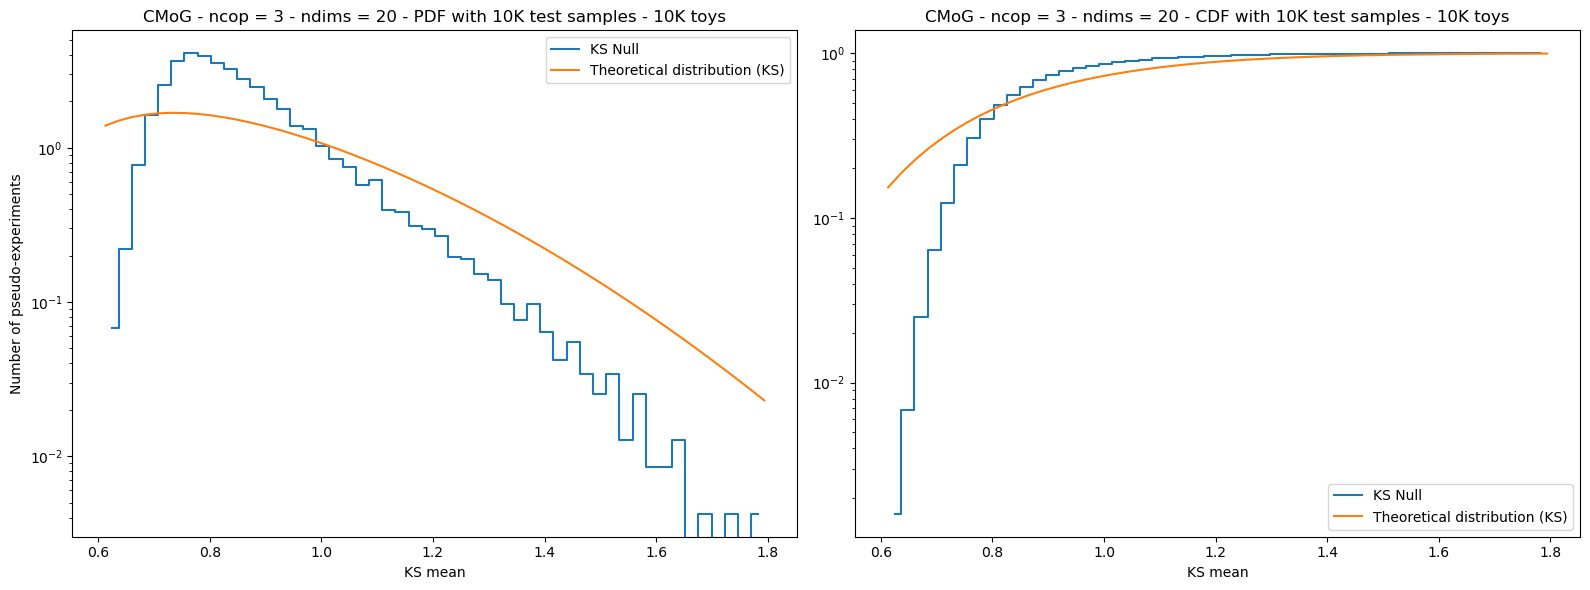

Time elapsed: 0.9731975831091404 seconds.


In [40]:
start = timer()

nsamples = KSTest.Inputs.batch_size_test
niter = KSTest.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(KSTest.Results[-1].result_value["statistic_means"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
theoretical_pdf_ks = kstwobign.pdf(x)
theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#shape_fit, loc_fit, scale_fit = lognorm.fit(bin_centers, floc=0)
#empirical_pdf_norm = lognorm.pdf(x, shape_fit, loc_fit, scale_fit)
#empirical_cdf_norm = lognorm.cdf(x, shape_fit, loc_fit, scale_fit)
empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='KS Null', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[0].set_ylim(0.01, 5)
ax[0].set_xlabel('KS mean')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='KS Null', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('KS mean')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [41]:
cl_list = [0.68, 0.95, 0.99]
ks_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
ks_thresholds

[[0.68, [6800, 3199], 0.8941368037382328],
 [0.95, [9500, 500], 1.1596554165953459],
 [0.99, [9900, 100], 1.370373063828215]]

## MultiKS Test

In [21]:
MultiKSTest.Test_tf()
MultiKSTest.Results[-1].result_value


------------------------------------------
Starting MultiKS tests calculation...
Running TF MultiKS tests...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.


MultiKS tests calculation completed in 780.4285912364721 seconds.


{'metric_list': array([0.0004, 0.0004, 0.0004, ..., 0.0003, 0.0004, 0.0006])}

In [ ]:
MultiKSTest.Results.save_to_json(null_hypotheses_dir+"Null_20D_MultiKS.json")

In [15]:
MultiKSTest.Results.load_from_json(null_hypotheses_dir+"Null_20D_MultiKS.json")

mu = 0.03380111696923397 +/- 1.6511439122407998e-06
sigma = 0.012849684479553574 +/- 0.0002597216086130338


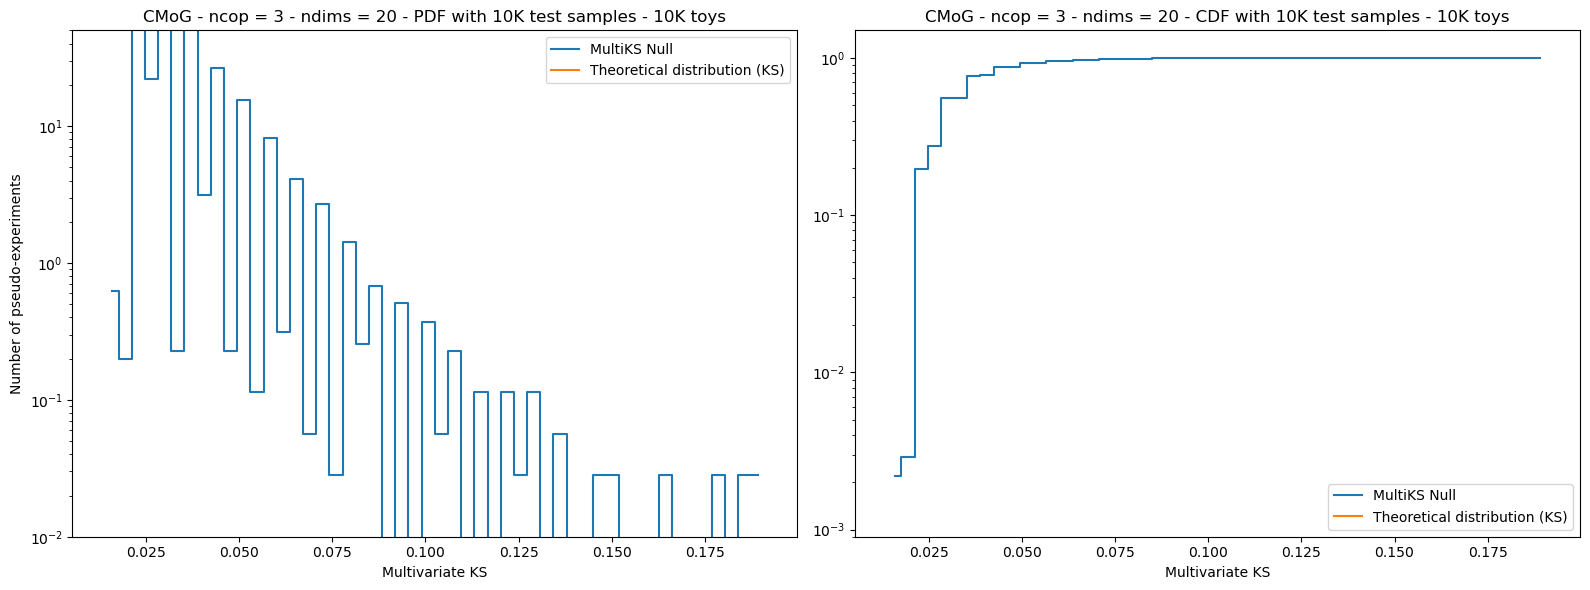

Time elapsed: 1.2928199917078018 seconds.


In [42]:
start = timer()

nsamples = MultiKSTest.Inputs.batch_size_test
niter = MultiKSTest.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(MultiKSTest.Results[-1].result_value["metric_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
theoretical_pdf_ks = kstwobign.pdf(x)
theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='MultiKS Null', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.04*np.sqrt(ns))
ax[0].set_ylim(0.01, 50)
ax[0].set_xlabel('Multivariate KS')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='MultiKS Null', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.04*np.sqrt(ns))
ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Multivariate KS')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [43]:
cl_list = [0.68, 0.95, 0.99]
multi_ks_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
multi_ks_thresholds

[[0.68, [6800, 3199], 0.035355336622712695],
 [0.95, [9500, 500], 0.05656854106588222],
 [0.99, [9900, 100], 0.07778174550905174]]

## SKS Test

In [19]:
#tf.config.run_functions_eagerly(True)#
SKSTest.Test_tf(max_vectorize=100)
SKSTest.Results[-1].result_value


------------------------------------------
Starting SKS metric calculation...
Running TF SKS calculation...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 100
Iterating from 0 to 100 out of 10000 .
Iterating from 100 to 200 out of 10000 .
Iterating from 200 to 300 out of 10000 .
Iterating from 300 to 400 out of 10000 .
Iterating from 400 to 500 out of 10000 .
Iterating from 500 to 600 out of 10000 .
Iterating from 600 to 700 out of 10000 .
Iterating from 700 to 800 out of 10000 .
Iterating from 800 to 900 out of 10000 .
Iterating from 900 to 1000 out of 10000 .
Iterating from 1000 to 1100 out of 10000 .
Iterating from 1100 to 1200 out of 10000 .
Iterating from 1200 to 1300 out of 10000 .
Iterating from 1300 to 1400 out of 10000 .
Iterating from 1400 to 1500 out of 10000 .
Iterating from 1500 to 1600 out of 10000 .

{'metric_lists': array([[0.0054    , 0.00980002, 0.01620001, ..., 0.02219999, 0.01010001,
         0.0131    ],
        [0.01190001, 0.0194    , 0.01980001, ..., 0.01890001, 0.0191    ,
         0.0205    ],
        [0.0131    , 0.01100004, 0.01850003, ..., 0.01200001, 0.01670003,
         0.01660001],
        ...,
        [0.0133    , 0.0107    , 0.01840001, ..., 0.01210004, 0.0115    ,
         0.0122    ],
        [0.0087    , 0.01410002, 0.01880002, ..., 0.01429999, 0.01109999,
         0.01720002],
        [0.01429999, 0.01570001, 0.01120001, ..., 0.00800002, 0.01150003,
         0.01120001]]),
 'metric_means': array([0.011586  , 0.01777501, 0.01472001, ..., 0.01166201, 0.011991  ,
        0.01179801]),
 'metric_stds': array([0.00310725, 0.00354074, 0.00314995, ..., 0.00322052, 0.00317074,
        0.00251639])}

In [20]:
SKSTest.Results.save_to_json(null_hypotheses_dir+"Null_20D_SKS.json")

In [32]:
SKSTest.Results.load_from_json(null_hypotheses_dir+"Null_20D_SKS.json")

mu = 0.8668035162525525 +/- 0.00019693599400883753
sigma = 0.140333885433575 +/- 0.0015126396170603035


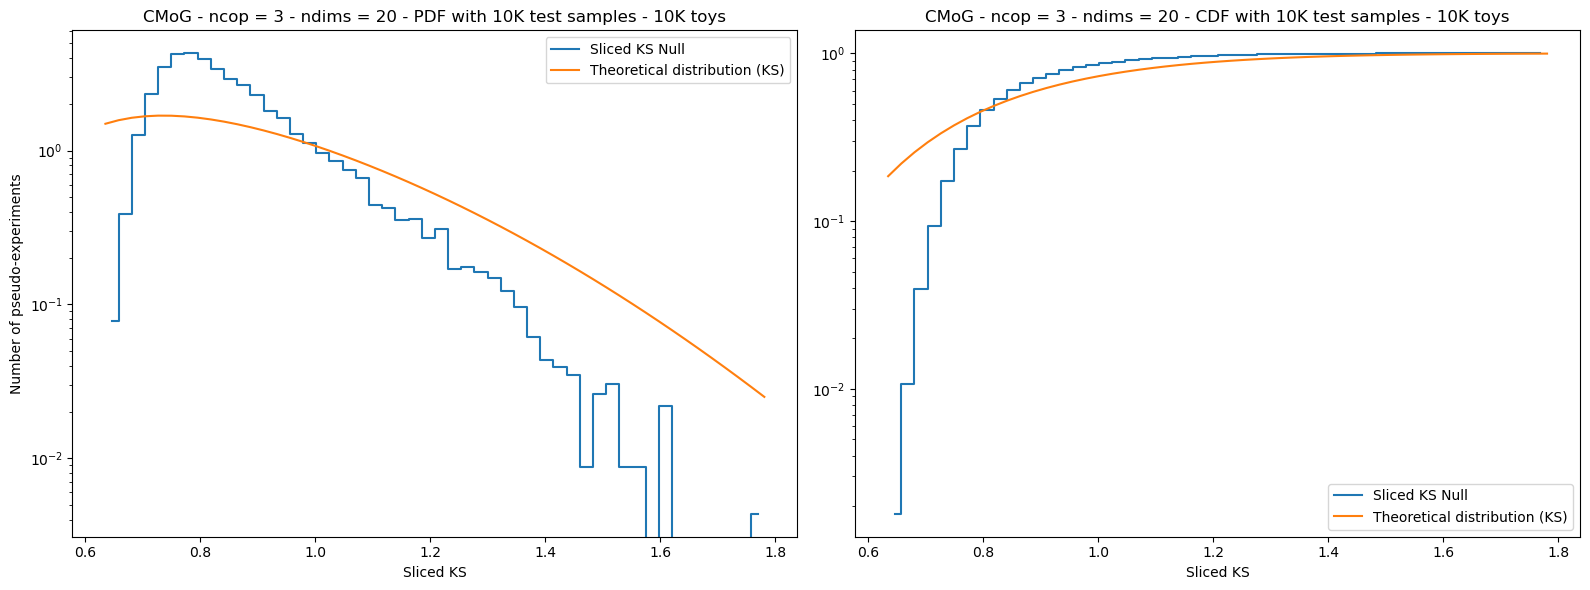

Time elapsed: 1.2579600643366575 seconds.


In [44]:
start = timer()

nsamples = SKSTest.Inputs.batch_size_test
niter = SKSTest.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(SKSTest.Results[-1].result_value["metric_means"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
theoretical_pdf_ks = kstwobign.pdf(x)
theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Sliced KS Null', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[0].set_ylim(0.01, 4)
ax[0].set_xlabel('Sliced KS')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Sliced KS Null', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Sliced KS')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [45]:
cl_list = [0.68, 0.95, 0.99]
sks_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
sks_thresholds

[[0.68, [6800, 3199], 0.8943488814115835],
 [0.95, [9500, 500], 1.1580999081257106],
 [0.99, [9900, 100], 1.3365030397696707]]

## SWD Test

In [23]:
SWDMetric.Test_tf(max_vectorize=100)
SWDMetric.Results[-1].result_value


------------------------------------------
Starting SWD metric calculation...
Running TF SWD calculation...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.


The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 100
Iterating from 0 to 100 out of 10000 .
Iterating from 100 to 200 out of 10000 .
Iterating from 200 to 300 out of 10000 .
Iterating from 300 to 400 out of 10000 .
Iterating from 400 to 500 out of 10000 .
Iterating from 500 to 600 out of 10000 .
Iterating from 600 to 700 out of 10000 .
Iterating from 700 to 800 out of 10000 .
Iterating from 800 to 900 out of 10000 .
Iterating from 900 to 1000 out of 10000 .
Iterating from 1000 to 1100 out of 10000 .
Iterating from 1100 to 1200 out of 10000 .
Iterating from 1200 to 1300 out of 10000 .
Iterating from 1300 to 1400 out of 10000 .
Iterating from 1400 to 1500 out of 10000 .
Iterating from 1500 to 1600 out of 10000 .
Iterating from 1600 to 1700 out of 10000 .
Iterating from 1700 to 1800 out of 10000 .
Iterating from 1800 to 1900 out of 10000 .
Iterating from 1900 to 2000 out of 10000 .
Iterating from 2000 to 2100 out of 10000 .
Iterating from 

{'metric_lists': array([[0.00877103, 0.03132907, 0.03585822, ..., 0.05868376, 0.01651061,
         0.05307966],
        [0.01805976, 0.06362214, 0.05277477, ..., 0.08653715, 0.05301344,
         0.16897984],
        [0.03478863, 0.03476205, 0.07361608, ..., 0.05483988, 0.03300669,
         0.10544259],
        ...,
        [0.02605265, 0.02756849, 0.05282951, ..., 0.03573821, 0.02364113,
         0.03707389],
        [0.01325854, 0.04377104, 0.03271386, ..., 0.04969791, 0.02371171,
         0.07033093],
        [0.02426292, 0.03351795, 0.02781683, ..., 0.02943675, 0.02075174,
         0.05619857]]),
 'metric_means': array([0.02450169, 0.06165841, 0.04629684, ..., 0.02757477, 0.0293908 ,
        0.02779175]),
 'metric_stds': array([0.01097966, 0.04202119, 0.02817618, ..., 0.01311516, 0.01450569,
        0.01309976])}

In [24]:
SWDMetric.Results.save_to_json(null_hypotheses_dir+"Null_20D_SWD.json")

In [21]:
SWDMetric.Results.load_from_json(null_hypotheses_dir+"Null_20D_SWD.json")

mu = 0.4766663833363448 +/- 0.00033413912562495527
sigma = 0.1827947279395539 +/- 0.0016528240832427233


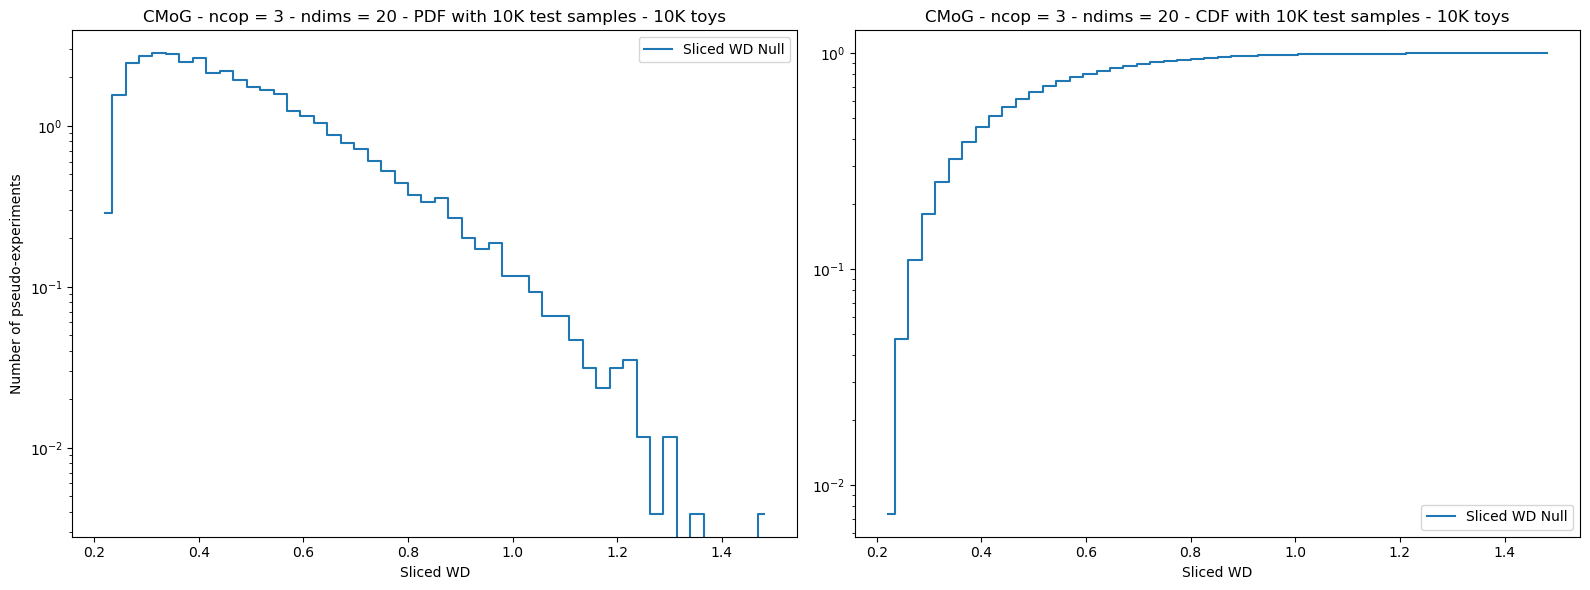

Time elapsed: 0.7309462372213602 seconds.


In [46]:
start = timer()

nsamples = SWDMetric.Inputs.batch_size_test
niter = SWDMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(SWDMetric.Results[-1].result_value["metric_means"])*np.sqrt(ns/ndims)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=0.155)
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=0.155)
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Sliced WD Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.008*np.sqrt(ns), 0.055*np.sqrt(ns))
#ax[0].set_ylim(0.01, 1.8)
ax[0].set_xlabel('Sliced WD')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Sliced WD Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[0].set_xlim(0.008*np.sqrt(ns), 0.055*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Sliced WD')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [47]:
cl_list = [0.68, 0.95, 0.99]
swd_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
swd_thresholds

[[0.68, [6800, 3199], 0.5291088139395204],
 [0.95, [9500, 500], 0.843958307342062],
 [0.99, [9900, 100], 1.0405082933087912]]

## FPD Test (TensorFlow)

In [ ]:
FPDMetric.Test_tf(max_vectorize=400)
#FPDMetric.Test_tf(max_vectorize=100)
FPDMetric.Results[-1].result_value


------------------------------------------
Starting FPD metric calculation...
Running TF FPD calculation...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 25
Iterating from 0 to 400 out of 10000 .
Iterating from 400 to 800 out of 10000 .
Iterating from 800 to 1200 out of 10000 .
Iterating from 1200 to 1600 out of 10000 .
Iterating from 1600 to 2000 out of 10000 .
Iterating from 2000 to 2400 out of 10000 .
Iterating from 2400 to 2800 out of 10000 .
Iterating from 2800 to 3200 out of 10000 .
Iterating from 3200 to 3600 out of 10000 .
Iterating from 3600 to 4000 out of 10000 .
Iterating from 4000 to 4400 out of 10000 .
Iterating from 4400 to 4800 out of 10000 .
Iterating from 4800 to 5200 out of 10000 .
Iterating from 5200 to 5600 out of 10000 .
Iterating from 5600 to 6000 out of 10000 .
Iterating from 6000 to 6400 o

{'metric_list': array([0.00036551, 0.00082987, 0.00047712, ..., 0.00037894, 0.00101584,
        0.00123229]),
 'metric_error_list': array([6.27514615e-05, 1.25460748e-04, 6.74763742e-05, ...,
        6.57296932e-05, 6.57265394e-05, 1.35116143e-04])}

In [ ]:
FPDMetric.Results.save_to_json(null_hypotheses_dir+"Null_20D_FPD_tf.json")

In [24]:
FPDMetric.Results.load_from_json(null_hypotheses_dir+"Null_20D_FPD_tf.json")

mu = 1.8322862496179955 +/- 0.01127290581380278
sigma = 1.061739413123709 +/- 0.015405710910367939


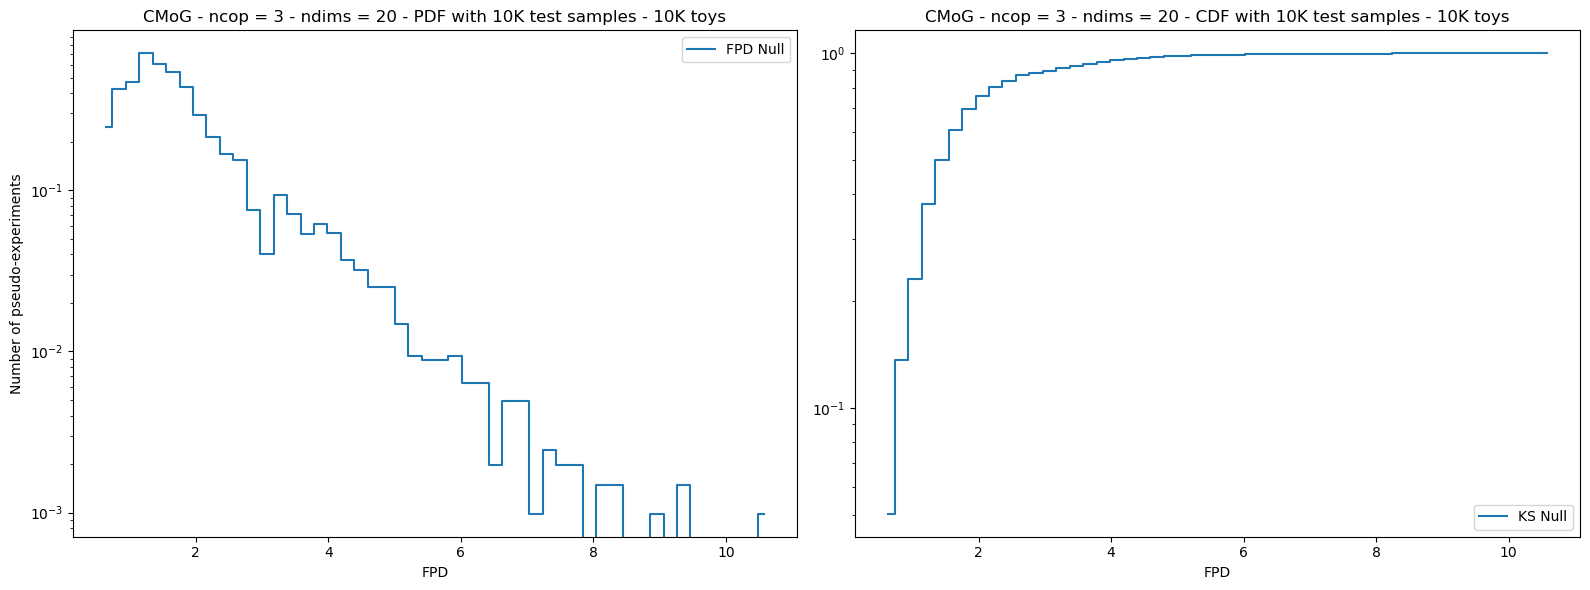

Time elapsed: 0.5936619713902473 seconds.


In [48]:
start = timer()

nsamples = FPDMetric.Inputs.batch_size_test
niter = FPDMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(FPDMetric.Results[-1].result_value["metric_list"])*(ns/ndims)**(3/2)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='FPD Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='FPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[0].set_ylim(0.01, 5)
ax[0].set_xlabel('FPD')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='KS Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='FPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('FPD')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [49]:
cl_list = [0.68, 0.95, 0.99]
fpd_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
fpd_thresholds

[[0.68, [6800, 3199], 1.9043200375245808],
 [0.95, [9500, 500], 4.05643791000847],
 [0.99, [9900, 100], 5.782369223969684]]

## KPD Test

In [ ]:
KPDMetric.Test_tf(max_vectorize=4)
KPDMetric.Results[-1].result_value


------------------------------------------
Starting KPD metric calculation...
Running TF KPD calculation...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 2500
Iterating from 0 to 4 out of 10000 .
Iterating from 4 to 8 out of 10000 .
Iterating from 8 to 12 out of 10000 .
Iterating from 12 to 16 out of 10000 .
Iterating from 16 to 20 out of 10000 .
Iterating from 20 to 24 out of 10000 .
Iterating from 24 to 28 out of 10000 .
Iterating from 28 to 32 out of 10000 .
Iterating from 32 to 36 out of 10000 .
Iterating from 36 to 40 out of 10000 .
Iterating from 40 to 44 out of 10000 .
Iterating from 44 to 48 out of 10000 .
Iterating from 48 to 52 out of 10000 .
Iterating from 52 to 56 out of 10000 .
Iterating from 56 to 60 out of 10000 .
Iterating from 60 to 64 out of 10000 .
Iterating from 64 to 68 out of 10000 .
Iterati

{'metric_list': array([-6.37194625e-05,  1.14464260e-05,  1.93954871e-04, ...,
         1.42335755e-04, -8.53141691e-05, -6.41831123e-05]),
 'metric_error_list': array([1.33109444e-04, 4.76949677e-04, 3.71009488e-04, ...,
        1.80161620e-04, 1.35565988e-04, 8.45276555e-05])}

In [ ]:
KPDMetric.Results.save_to_json(null_hypotheses_dir+"Null_20D_KPD.json")

In [28]:
KPDMetric.Results.load_from_json(null_hypotheses_dir+"Null_20D_KPD.json")

mu = 0.017265858792085986 +/- 0.00020151340086804352
sigma = 0.14195541584175064 +/- 0.0025818019332037798


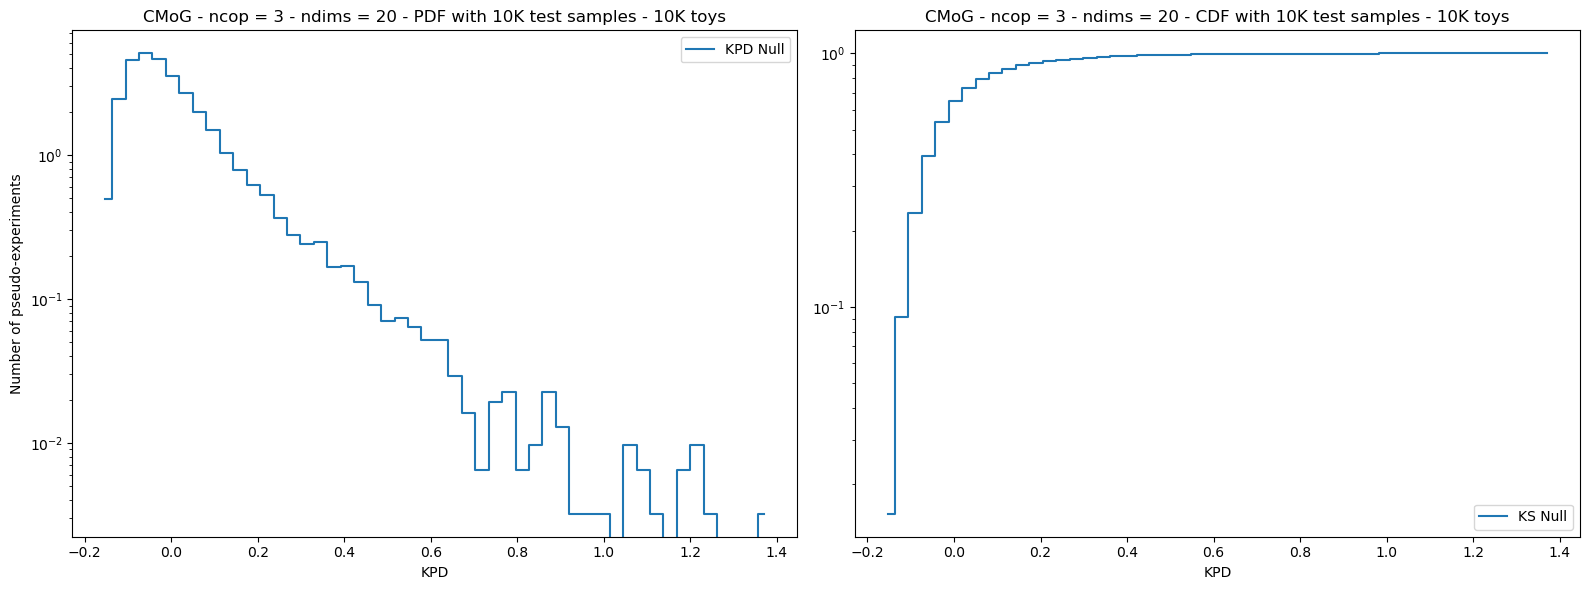

Time elapsed: 0.6398824322968721 seconds.


In [50]:
start = timer()

nsamples = KPDMetric.Inputs.batch_size_test
niter = KPDMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(KPDMetric.Results[-1].result_value["metric_list"])*ns/np.sqrt(ndims)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='KPD Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='KPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[0].set_ylim(0.01, 5)
ax[0].set_xlabel('KPD')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='KS Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='KPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('KPD')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [51]:
cl_list = [0.68, 0.95, 0.99]
kpd_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
kpd_thresholds

[[0.68, [6800, 3199], 0.030312771611405838],
 [0.95, [9500, 500], 0.29297438681123533],
 [0.99, [9900, 100], 0.5666769372557507]]

# Alternative hypotheses

## Thresholds

In [52]:
fn_thresholds = fn_thresholds[1:]
fpd_thresholds = fpd_thresholds[1:]
kpd_thresholds = kpd_thresholds[1:]
ks_thresholds = ks_thresholds[1:]
multi_ks_thresholds = multi_ks_thresholds[1:]
sks_thresholds = sks_thresholds[1:]
swd_thresholds = swd_thresholds[1:]

In [53]:
print(f"fn_thresholds: {fn_thresholds}")
print(f"fpd_thresholds: {fpd_thresholds}")
print(f"kpd_thresholds: {kpd_thresholds}")
print(f"ks_thresholds: {ks_thresholds}")
print(f"multi_ks_thresholds: {multi_ks_thresholds}")
print(f"sks_thresholds: {sks_thresholds}")
print(f"swd_thresholds: {swd_thresholds}")

fn_thresholds: [[0.95, [9500, 500], 1.2038495020448647], [0.99, [9900, 100], 1.4759807705243078]]
fpd_thresholds: [[0.95, [9500, 500], 4.05643791000847], [0.99, [9900, 100], 5.782369223969684]]
kpd_thresholds: [[0.95, [9500, 500], 0.29297438681123533], [0.99, [9900, 100], 0.5666769372557507]]
ks_thresholds: [[0.95, [9500, 500], 1.1596554165953459], [0.99, [9900, 100], 1.370373063828215]]
multi_ks_thresholds: [[0.95, [9500, 500], 0.05656854106588222], [0.99, [9900, 100], 0.07778174550905174]]
sks_thresholds: [[0.95, [9500, 500], 1.1580999081257106], [0.99, [9900, 100], 1.3365030397696707]]
swd_thresholds: [[0.95, [9500, 500], 0.843958307342062], [0.99, [9900, 100], 1.0405082933087912]]


## Scan

In [54]:
niter = 10_000
nsamples = 10_000
ns = nsamples**2 /(2*nsamples)

fn_list = []
fpd_list = []
kpd_list = []
ks_list = []
multi_ks_list = []
sks_list = []
swd_list = []
exclusion_list = []

fn_threshold_number = 0
fpd_threshold_number = 0
kpd_threshold_number = 0
ks_threshold_number = 0
multi_ks_threshold_number = 0
sks_threshold_number = 0
swd_threshold_number = 0

start = timer()  
for i in range(500):
    seed = 0
    ncomp = 3
    ndims = 20
    delta = 0.0001
    eps = 0+i*delta
    print("\n------------------")
    print(f"eps = {eps}")
    eps_loc = 10*eps
    eps_scale = eps
    dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
    dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)

    TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                       dist_2_input = dist_2,
                                                       niter = 10,
                                                       batch_size_test = 10_000,
                                                       batch_size_gen = 100,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = False)

    FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             verbose = False)
    FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = False,
                               verbose = False)
    KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                                 progress_bar = False,
                                 verbose = False)
    KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                             verbose = False)
    MultiKSTest = GMetrics.MultiKSTest(TwoSampleTestInputs,
                                       verbose = False)
    SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               verbose = False)
    SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                                   nslices = 100,
                                   seed_slicing = 0,
                                   verbose = False)

    if fn_threshold_number < len(fn_thresholds):
        FNMetric.Test_tf(max_vectorize = 1000)
        fn = np.mean(FNMetric.Results[-1].result_value["metric_list"])*np.sqrt(ns)/ndims
        fn_list.append(fn)
        print(f"fn statistic = {fn}\t-\t next threshold = {fn_thresholds[fn_threshold_number][2]} at {fn_thresholds[fn_threshold_number][0]} CL")
        fn_threshold = fn_thresholds[fn_threshold_number]
        if fn > fn_threshold[2]:
            end = timer()
            print(f"=======> fn excluded at {fn_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "fn statistic", fn, fn_threshold[0]])
            fn_threshold_number += 1
            
    if fpd_threshold_number < len(fpd_thresholds):
        FPDMetric.Test_tf(max_vectorize=400)
        fpd = np.mean(FPDMetric.Results[-1].result_value["metric_list"])*(ns/ndims)**(3/2)
        fpd_list.append(fpd)
        print(f"fpd statistic = {fpd}\t-\t next threshold = {fpd_thresholds[fpd_threshold_number][2]} at {fpd_thresholds[fpd_threshold_number][0]} CL")
        fpd_threshold = fpd_thresholds[fpd_threshold_number]
        if fpd > fpd_threshold[2]:
            end = timer()
            print(f"=======> fpd excluded at {fpd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "fpd statistic", fpd, fpd_threshold[0]])
            fpd_threshold_number += 1
            
    if kpd_threshold_number < len(kpd_thresholds):
        KPDMetric.Test_tf(max_vectorize=2)
        kpd = np.mean(KPDMetric.Results[-1].result_value["metric_list"])*ns/np.sqrt(ndims)
        kpd_list.append(kpd)
        print(f"kpd statistic = {kpd}\t-\t next threshold = {kpd_thresholds[kpd_threshold_number][2]} at {kpd_thresholds[kpd_threshold_number][0]} CL")
        kpd_threshold = kpd_thresholds[kpd_threshold_number]
        if kpd > kpd_threshold[2]:
            end = timer()
            print(f"=======> kpd excluded at {kpd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "kpd statistic", kpd, kpd_threshold[0]])
            kpd_threshold_number += 1

    if ks_threshold_number < len(ks_thresholds):
        KSTest.Test_tf(max_vectorize=1000)
        ks = np.mean(KSTest.Results[-1].result_value["statistic_means"])*np.sqrt(ns)
        ks_list.append(ks)
        print(f"ks statistic = {ks}\t-\t next threshold = {ks_thresholds[ks_threshold_number][2]} at {ks_thresholds[ks_threshold_number][0]} CL")
        ks_threshold = ks_thresholds[ks_threshold_number]
        if ks > ks_threshold[2]:
            end = timer()
            print(f"=======> ks excluded at {ks_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "ks statistic", ks, ks_threshold[0]])
            ks_threshold_number += 1
            
    if multi_ks_threshold_number < len(multi_ks_thresholds):
        MultiKSTest.Test_tf()
        multi_ks = np.mean(MultiKSTest.Results[-1].result_value["metric_list"])*np.sqrt(ns)
        multi_ks_list.append(multi_ks)
        print(f"multi ks statistic = {multi_ks}\t-\t next threshold = {multi_ks_thresholds[multi_ks_threshold_number][2]} at {multi_ks_thresholds[multi_ks_threshold_number][0]} CL")
        multi_ks_threshold = multi_ks_thresholds[multi_ks_threshold_number]
        if multi_ks > multi_ks_threshold[2]:
            end = timer()
            print(f"=======> multi ks excluded at {multi_ks_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "multi ks statistic", multi_ks, multi_ks_threshold[0]])
            multi_ks_threshold_number += 1
            
    if sks_threshold_number < len(sks_thresholds):
        SKSTest.Test_tf(max_vectorize=1000)
        sks = np.mean(SKSTest.Results[-1].result_value["metric_means"])*np.sqrt(ns)
        sks_list.append(sks)
        print(f"sks statistic = {sks}\t-\t next threshold = {sks_thresholds[sks_threshold_number][2]} at {sks_thresholds[sks_threshold_number][0]} CL")
        sks_threshold = sks_thresholds[sks_threshold_number]
        if sks > sks_threshold[2]:
            end = timer()
            print(f"=======> sks excluded at {sks_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "sks statistic", sks, sks_threshold[0]])
            sks_threshold_number += 1
            
    if swd_threshold_number < len(swd_thresholds):
        SWDMetric.Test_tf(max_vectorize=1000)
        swd = np.mean(SWDMetric.Results[-1].result_value["metric_means"])*np.sqrt(ns/ndims)
        swd_list.append(swd)
        print(f"swd statistic = {swd}\t-\t next threshold = {swd_thresholds[swd_threshold_number][2]} at {swd_thresholds[swd_threshold_number][0]} CL")
        swd_threshold = swd_thresholds[swd_threshold_number]
        if swd > swd_threshold[2]:
            end = timer()
            print(f"=======> swd excluded at {swd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "swd statistic", swd, swd_threshold[0]])
            swd_threshold_number += 1
            
    if fn_threshold_number >= len(fn_thresholds) and fpd_threshold_number >= len(fpd_thresholds) and kpd_threshold_number >= len(kpd_thresholds) and ks_threshold_number >= len(ks_thresholds) and multi_ks_threshold_number >= len(multi_ks_thresholds) and sks_threshold_number >= len(sks_thresholds) and swd_threshold_number >= len(swd_thresholds):
        break
                        
end = timer()
print("Time elapsed:", end-start, "seconds.")


------------------
eps = 0.0
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
fn statistic = 0.7945219623634879	-	 next threshold = 1.2038495020448647 at 0.95 CL
fpd statistic = 1.7164940434015397	-	 next threshold = 4.05643791000847 at 0.95 CL
kpd statistic = 0.00525901255581679	-	 next threshold = 0.29297438681123533 at 0.95 CL
ks statistic = 0.8245575488116478	-	 next threshold = 1.1596554165953459 at 0.95 CL
multi ks statistic = 0.026870056697601317	-	 next threshold = 0.05656854106588222 at 0.95 CL
sks statistic = 0.8253424192784187	-	 next threshold = 1.1580999081257106 at 0.95 CL
swd statistic = 0.44419326795809694	-	 next threshold = 0.843958307342062 at 0.95 CL

------------------
eps = 0.0001
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
fn statistic = 0.7944833740789918	-	 next threshold = 1.2038495020448647 at 0.95 CL
fpd statistic = 1.7144211445

## Results

In [56]:
print(f"fn_thresholds: {fn_thresholds}")
print(f"fpd_thresholds: {fpd_thresholds}")
print(f"kpd_thresholds: {kpd_thresholds}")
print(f"ks_thresholds: {ks_thresholds}")
print(f"multi_ks_thresholds: {multi_ks_thresholds}")
print(f"sks_thresholds: {sks_thresholds}")
print(f"swd_thresholds: {swd_thresholds}")

fn_thresholds: [[0.95, [9500, 500], 1.2038495020448647], [0.99, [9900, 100], 1.4759807705243078]]
fpd_thresholds: [[0.95, [9500, 500], 4.05643791000847], [0.99, [9900, 100], 5.782369223969684]]
kpd_thresholds: [[0.95, [9500, 500], 0.29297438681123533], [0.99, [9900, 100], 0.5666769372557507]]
ks_thresholds: [[0.95, [9500, 500], 1.1596554165953459], [0.99, [9900, 100], 1.370373063828215]]
multi_ks_thresholds: [[0.95, [9500, 500], 0.05656854106588222], [0.99, [9900, 100], 0.07778174550905174]]
sks_thresholds: [[0.95, [9500, 500], 1.1580999081257106], [0.99, [9900, 100], 1.3365030397696707]]
swd_thresholds: [[0.95, [9500, 500], 0.843958307342062], [0.99, [9900, 100], 1.0405082933087912]]


In [57]:
exclusion_list

[[0.0009000000000000001, 'ks statistic', 1.18069179640513, 0.95],
 [0.0013000000000000002, 'ks statistic', 1.4118451834412984, 0.99],
 [0.0028, 'fn statistic', 1.2218990783062589, 0.95],
 [0.0038, 'fn statistic', 1.4962731163094143, 0.99],
 [0.004200000000000001, 'sks statistic', 1.1699934590159013, 0.95],
 [0.0054, 'sks statistic', 1.3369978437711887, 0.99],
 [0.008400000000000001, 'fpd statistic', 4.1031791161063165, 0.95],
 [0.0091, 'swd statistic', 0.8465645836567217, 0.95],
 [0.0109, 'kpd statistic', 0.29787089136152123, 0.95],
 [0.0111, 'fpd statistic', 5.7891167019617855, 0.99],
 [0.0122, 'swd statistic', 1.0430527406023653, 0.99],
 [0.015000000000000001, 'kpd statistic', 0.5691370020381052, 0.99]]

In [58]:
with open(null_hypotheses_dir+"exclusion_list.json", "r") as infile:
    exclusion_list_dict = json.load(infile)

In [59]:
exclusion_list_dict

{'5D': [[0.001, 'ks statistic', 1.150887381160314, 0.95],
  [0.0012000000000000001, 'multi ks statistic', 1.530886280735438, 0.95],
  [0.0014, 'ks statistic', 1.3180470296371594, 0.99],
  [0.0014, 'multi ks statistic', 1.7239264333480646, 0.99],
  [0.0028, 'sks statistic', 1.1180563783334174, 0.95],
  [0.0038, 'sks statistic', 1.2864044770591279, 0.99],
  [0.0056, 'fn statistic', 1.211483576862899, 0.95],
  [0.0071, 'fpd statistic', 4.362107332247842, 0.95],
  [0.0079, 'fn statistic', 1.536376470735762, 0.99],
  [0.008400000000000001, 'kpd statistic', 0.3087719336084374, 0.95],
  [0.0097, 'fpd statistic', 6.420883800476466, 0.99],
  [0.0117, 'kpd statistic', 0.5851484911513134, 0.99],
  [0.0143, 'swd statistic', 2.2122717982708178, 0.95],
  [0.018000000000000002, 'swd statistic', 2.717441299061513, 0.99]]}

In [60]:
exclusion_list_dict = {**exclusion_list_dict, "20D": exclusion_list}

In [61]:
exclusion_list_dict

{'5D': [[0.001, 'ks statistic', 1.150887381160314, 0.95],
  [0.0012000000000000001, 'multi ks statistic', 1.530886280735438, 0.95],
  [0.0014, 'ks statistic', 1.3180470296371594, 0.99],
  [0.0014, 'multi ks statistic', 1.7239264333480646, 0.99],
  [0.0028, 'sks statistic', 1.1180563783334174, 0.95],
  [0.0038, 'sks statistic', 1.2864044770591279, 0.99],
  [0.0056, 'fn statistic', 1.211483576862899, 0.95],
  [0.0071, 'fpd statistic', 4.362107332247842, 0.95],
  [0.0079, 'fn statistic', 1.536376470735762, 0.99],
  [0.008400000000000001, 'kpd statistic', 0.3087719336084374, 0.95],
  [0.0097, 'fpd statistic', 6.420883800476466, 0.99],
  [0.0117, 'kpd statistic', 0.5851484911513134, 0.99],
  [0.0143, 'swd statistic', 2.2122717982708178, 0.95],
  [0.018000000000000002, 'swd statistic', 2.717441299061513, 0.99]],
 '20D': [[0.0009000000000000001, 'ks statistic', 1.18069179640513, 0.95],
  [0.0013000000000000002, 'ks statistic', 1.4118451834412984, 0.99],
  [0.0028, 'fn statistic', 1.2218990783

In [62]:
with open(null_hypotheses_dir+"exclusion_list.json", "w") as outfile:
    json.dump(exclusion_list_dict, outfile)

# Comparing with Likeliood Ratio

## LR Test (95% CL) - $\epsilon=0.000049$

In [136]:
seed = 0
ncomp = 3
ndims = 20
eps = 0.0000485
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10_000,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.


In [137]:
LRMetric.Test_tf()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 10000


In [ ]:
#LRMetric.Results.load_from_json(null_hypotheses_dir+"Null_20D_LR_eps_00000975.json")
LRMetric.Results.save_to_json(null_hypotheses_dir+"Null_20D_LR_eps_00000485.json")

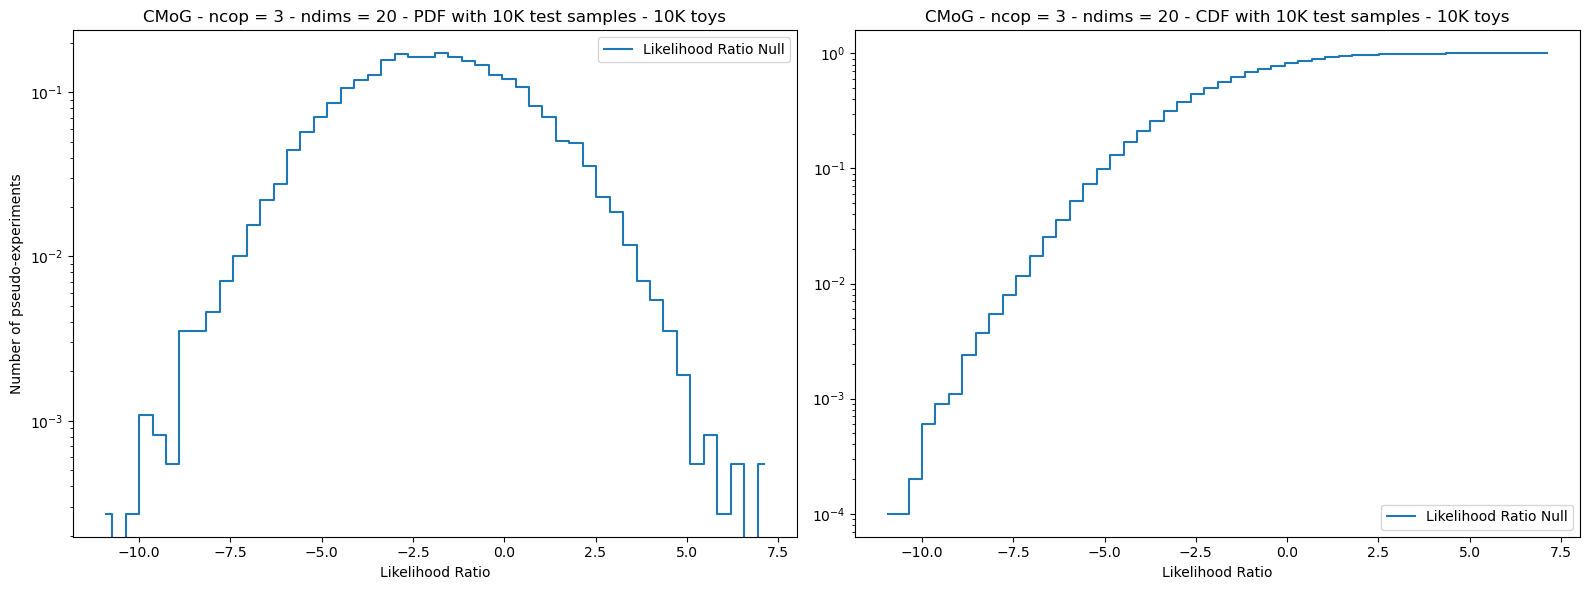

Time elapsed: 0.6870608348399401 seconds.


In [ ]:
start = timer()

nsamples = LRMetric.Inputs.batch_size_test
niter = LRMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(-300,-100)
#ax[0].set_ylim(0.00001, 0.02)
ax[0].set_xlabel('Likelihood Ratio')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(-300,-100)
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Likelihood Ratio')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], -0.8089330070556044],
 [0.95, [9500, 500], 1.9248006346380582],
 [0.99, [9900, 100], 3.4034836069195626]]

In [ ]:
seed = 0
#ncomp = 3
#ndims = 5
#eps = 0.000129
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=False,
                             verbose = True)
LRMetric.Test_tf()
LRMetric.Results[-1].result_value

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
To run under the null hypothesis, set the `null_test` attribute to True.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10
batch_size = 10000
LR metric calculation completed in 6.661332093179226 seconds.


{'logprob_ref_ref_sum_list': array([-91091.64041651, -92416.07424787, -91709.00704386, -92218.29045018,
        -91966.28774742, -92128.37421613, -92504.57773683, -91459.70230666,
        -91670.13693392, -91732.91029098]),
 'logprob_ref_alt_sum_list': array([-90763.99018212, -91921.79958821, -92008.6573301 , -92035.22795868,
        -92361.68761708, -91585.66258794, -92475.53246415, -92058.94998394,
        -91047.22489737, -91545.99826119]),
 'logprob_alt_alt_sum_list': array([-90763.45288002, -91917.97264023, -92008.32663046, -92033.75337287,
        -92359.94558851, -91585.64949782, -92475.39150271, -92058.03457205,
        -91042.78526693, -91543.70485615]),
 'lik_ratio_list': array([1.07460421, 7.65389596, 0.66139928, 2.94917163, 3.48405715,
        0.02618023, 0.28192289, 1.83082378, 8.87926087, 4.58681007]),
 'lik_ratio_norm_list': array([0.01074604, 0.07653896, 0.00661399, 0.02949172, 0.03484057,
        0.0002618 , 0.00281923, 0.01830824, 0.08879261, 0.0458681 ])}

In [ ]:
np.mean(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)

2.222304105836738

## LR Test (99% CL) - $\epsilon=0.00007$

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.00007
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10_000,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.


In [ ]:
LRMetric.Test_tf()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 10000
LR metric calculation completed in 1440.2184292739257 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, ...,
        -26414.61320193, -26051.01197648, -26070.38371944]),
 'logprob_ref_alt_sum_list': array([-26119.44929672, -26171.75648107, -26213.63406758, ...,
        -26145.33669568, -26199.68479434, -26171.97875077]),
 'logprob_alt_alt_sum_list': array([-26118.58683487, -26178.78691354, -26218.28600056, ...,
        -26146.4472976 , -26205.60443128, -26175.61106773]),
 'lik_ratio_list': array([  1.72492369, -14.06086495,  -9.30386596, ...,  -2.22120383,
        -11.83927387,  -7.26463392]),
 'lik_ratio_norm_list': array([ 0.01724924, -0.14060865, -0.09303866, ..., -0.02221204,
        -0.11839274, -0.07264634])}

In [ ]:
#LRMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_LR_eps_00001635.json")
LRMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_LR_eps_0000164.json")

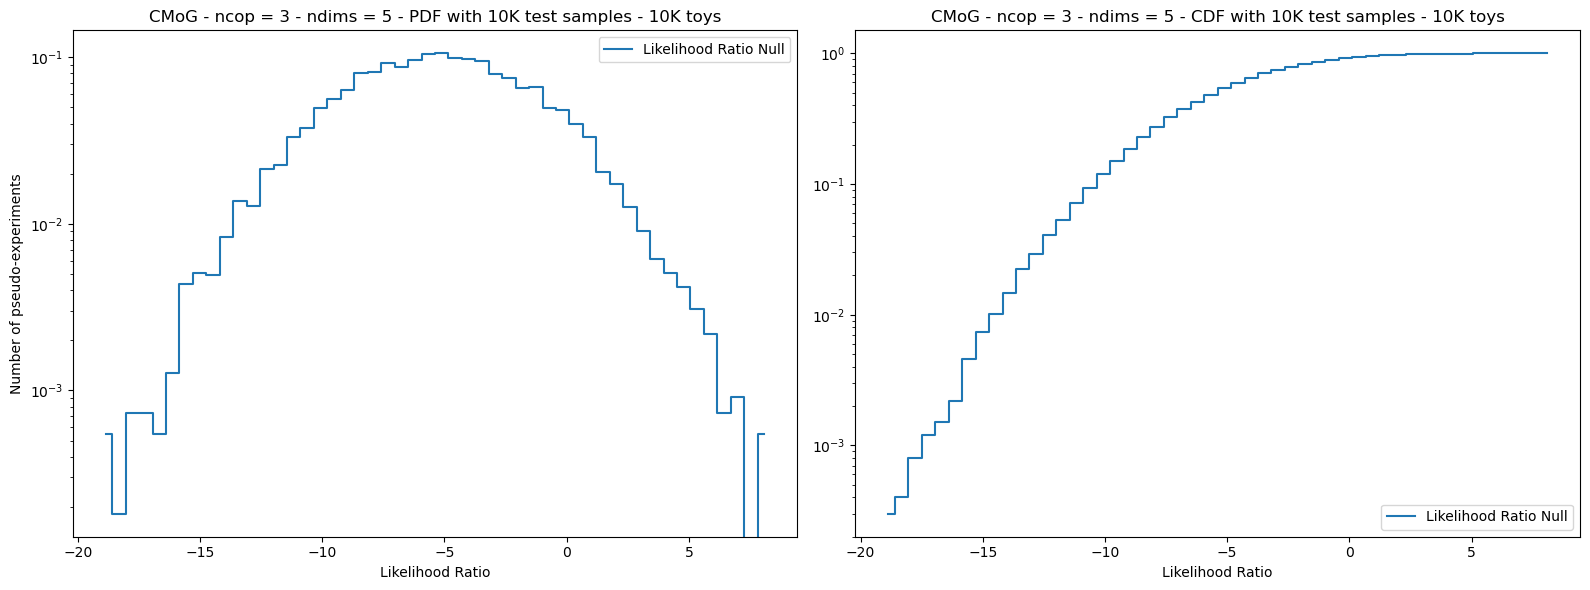

Time elapsed: 0.6172770792618394 seconds.


In [ ]:
start = timer()

nsamples = LRMetric.Inputs.batch_size_test
niter = LRMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(-300,-100)
#ax[0].set_ylim(0.00001, 0.02)
ax[0].set_xlabel('Likelihood Ratio')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(-300,-100)
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Likelihood Ratio')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], -3.4133923397301884],
 [0.95, [9500, 500], 1.089049430842976],
 [0.99, [9900, 100], 3.799240150262074]]

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000164
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=False,
                             verbose = True)
LRMetric.Test_tf()
LRMetric.Results[-1].result_value

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
To run under the null hypothesis, set the `null_test` attribute to True.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10
batch_size = 10000
LR metric calculation completed in 6.10512091498822 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, -26552.47483623,
        -26009.27182095, -26356.5578978 , -26635.53715761, -25999.13544257,
        -26068.22485645, -26277.71193775]),
 'logprob_ref_alt_sum_list': array([-26118.56448117, -26163.18850175, -26207.48728545, -26222.27585643,
        -26725.53827988, -26382.55881029, -26947.65853257, -26305.85684315,
        -26426.97206382, -26327.30466068]),
 'logprob_alt_alt_sum_list': array([-26110.56037402, -26162.70223468, -26204.52779286, -26219.61737666,
        -26720.32105349, -26381.60002624, -26944.89840445, -26304.69828797,
        -26428.10207059, -26326.91485399]),
 'lik_ratio_list': array([16.00821429,  0.97253414,  5.91898518,  5.31695954, 10.43445279,
         1.91756811,  5.52025623,  2.31711037, -2.26001355,  0.77961338]),
 'lik_ratio_norm_list': array([ 0.16008214,  0.00972534,  0.05918985,  0.0531696 ,  0.10434453,
         0.01917568,  0.05520256,  0.0231711 , -0.02260014,  0.007

In [ ]:
np.mean(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)

3.318146687649161